In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

## Préparation des données d'entrainement

Les fichiers sont : 

In [2]:
!ls

X_test.npy   prep_data.ipynb	    test.csv	   train.csv   y_train.npy
X_train.npy  sample_submission.csv  test_data.npy  y_test.npy


### Lecture des données 

In [3]:
# Lecture du fichier CSV
data = pd.read_csv('train.csv') # 42000x784

In [4]:
data.head()
# label + 784=28x28  pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# extraire les labels et les pixels
y = data.pop('label').values
X = data.values.astype('float32')

In [6]:
print(y.shape)
print(X.shape)

(42000,)
(42000, 784)


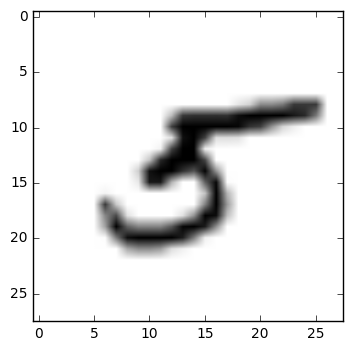

In [7]:
ind = 80
plt.imshow(X[ind].reshape((28,28)),cmap=cm.binary)

### Transformation : StandardScaler

In [8]:
X_std = StandardScaler().fit(X).transform(X)

In [9]:
print(X_std.shape)

(42000, 784)


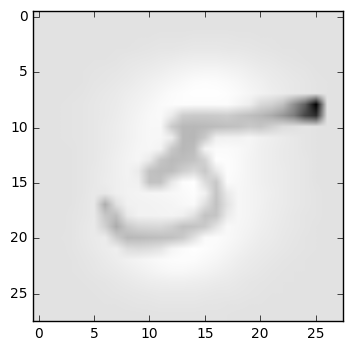

In [10]:
plt.imshow(X_std[ind].reshape((28,28)),cmap=cm.binary)

### Train/Test Split 

In [11]:
# Découpage 70% / 30%, découpage équilibré 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


### Enregistrer les fichiers sous forme de tableaux NumPy

In [12]:
np.save("X_train.npy",X_train)
np.save("y_train.npy",y_train)

np.save("X_test.npy",X_test)
np.save("y_test.npy",y_test)

## Préparation des données à classer

In [13]:
test_data = pd.read_csv('test.csv').values.astype('float32')
test_data = StandardScaler().fit(test_data).transform(test_data)

In [14]:
np.save("test_data.npy",test_data)